In [1]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
num_classes = 10 # 0～9までの手書き文字
epochs = 4 # 訓練データを何回繰り返して学習させるのか

img_rows, img_cols = 28, 28

# 学習データとテストデータに分割したデータ
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# backendがTensorflowとTheanoで配列のshapeが異なるために2パターン記述
print(K.image_data_format())
if K.image_data_format() == 'channels_first':
  # 1次元配列に変換
  x_train = x_train.reshape(s_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)

else:
  # 1次元配列に変換
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
  
# 入力データ[0, 1]の範囲に正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 255で割ったものを新たに変数とする
x_train /= 255
x_test /= 255

print('x_train shape : ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# ラベルをOne-Hotベクトルで表現
"""
例えば、サンプルに対するターゲットが「5」の場合次のような形になります。
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
"""
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
channels_last
x_train shape :  (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 28, 28, 1)
(60000, 10)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# sampling to mak small data for lecture
import numpy as np
y_train_org = y_train
x_train_org = x_train

# 60000個から1000個をランダムにサンプリング
N = 1000
#inds = range(N)
inds = np.array(range(60000))
np.random.shuffle(inds)
inds = inds[:N]
y_train = y_train[inds][:]
x_train = x_train[inds][:]
print(y_train.shape)

(1000, 10)


In [4]:
# CNNネットワークの構築
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape)) # 3×3のカーネルサイズの2D Convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # 全結合層
model.add(Dense(num_classes, activation='softmax'))

# 損失関数,最適化関数,評価指標を指定してモデルをコンパイル
model.compile(loss=keras.losses.categorical_crossentropy,
             #optimizer=keras.optimizers.Adadelta(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

# モデルの学習
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test, y_test))

Epoch 1/4
8/8 [==============================] - 32s 270ms/step - loss: 1.6814 - accuracy: 0.5240 - val_loss: 0.7251 - val_accuracy: 0.7685
Epoch 2/4
8/8 [==============================] - 1s 102ms/step - loss: 0.6560 - accuracy: 0.7960 - val_loss: 0.5189 - val_accuracy: 0.8477
Epoch 3/4
8/8 [==============================] - 1s 102ms/step - loss: 0.3842 - accuracy: 0.8850 - val_loss: 0.4433 - val_accuracy: 0.8648
Epoch 4/4
8/8 [==============================] - 1s 101ms/step - loss: 0.3149 - accuracy: 0.8960 - val_loss: 0.3878 - val_accuracy: 0.8799


{'loss': [1.6814043521881104, 0.6560326218605042, 0.3842330276966095, 0.3149268627166748], 'accuracy': [0.5239999890327454, 0.7960000038146973, 0.8849999904632568, 0.8960000276565552], 'val_loss': [0.7251490354537964, 0.5189098119735718, 0.44328731298446655, 0.38775312900543213], 'val_accuracy': [0.7684999704360962, 0.8476999998092651, 0.864799976348877, 0.8798999786376953]}


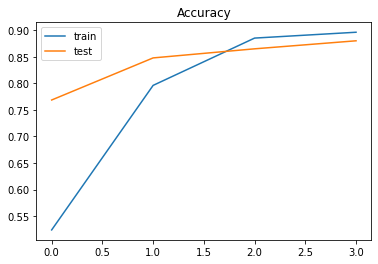

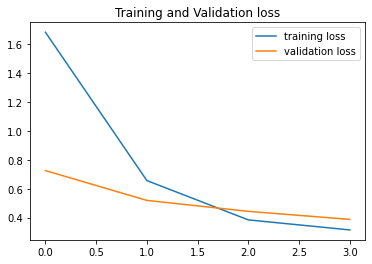

In [5]:
import matplotlib.pyplot as plt
# 学習をグラフ化（正解率）
print(model.history.history)
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

# Accuracy Plot
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss Plot
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(loss ,label = 'training loss')
plt.plot(val_loss, label= 'validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [6]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3877529203891754
Test accuracy: 0.8798999786376953


In [7]:
# モデルの概要を表示
model.summary()
    
# 概要を画像に出力
#plot_model(model, to_file='model.png')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               991360    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

6373
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


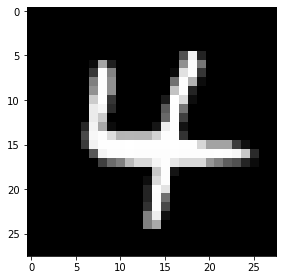

In [8]:
# 1つのサンプルデータを用いてテスト
from skimage import io
import numpy as np
import random
# test dataをランダムに取得
ind = np.int16(np.round(random.random()*x_test.shape[0]))
print(ind)
x_sample = x_test[ind]
y_sample = y_test[ind]

# 画像を可視化
x_sample2 = x_sample.reshape(x_sample.shape[0], x_sample.shape[1])
print(y_sample)
io.imshow(x_sample2)
#plt.show()

# 予測関数入力用に変形
x_sample = x_sample.reshape(1, img_rows, img_cols, 1)

# ネットワークによる予測
expect = model.predict(x_sample)
print(np.round(expect))